# imports

In [1]:
import pandas as pd # Таблицы
from tabulate import tabulate # Оформление таблицы
import numpy as np # Для массивов, sqrt, sing, ln
import matplotlib.pyplot as plt # Для построения графиков
from matplotlib.pyplot import figure # Для коррекции размера выводимого изображения
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
import math
from decimal import *

<ipython-input-1-ab11213cf699>:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.axislines import SubplotZero


# График целевой функции

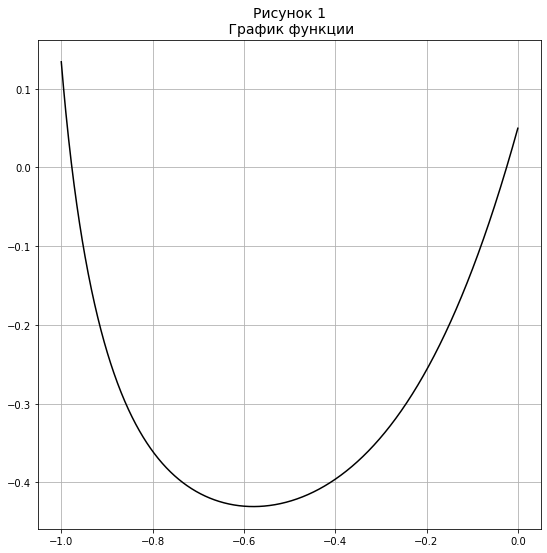

In [29]:
Eps, interval, max_iters, num_of_picture = [1e-2, 1e-5, 1e-17], np.linspace(-1, 0, 1000), 100000, 0
#Три значения Eps, интервал, максимальное кол-во итераций, номер рисунка

#def F(x): # Задаем саму функци
 #   return math.log(2 * x ** 5 - 7 * x + math.sqrt(11)) + math.sinh((-4 * x ** 2 - 4 * x + 3 - 4 * math.sqrt(2)) / (3 * x ** 2 + 3 * x + 3 * math.sqrt(2))) - 1.0
def F(x):
    return -math.sin(((-x) ** 4 - 4 * x ** 3 - 8 * x ** 2 - 7 * x + 1) / math.sqrt(11)) - math.log((4 * x ** 5 - 4 * math.sqrt(11) * x ** 4 + 8 * x ** 3 + 5 * x ** 2 - 5 * math.sqrt(10) * x + 9) / (x ** 2 - math.sqrt(10) * x + 2)) / math.log(10) + 1.0;
def F1(x):
    return F(x) * (-1)


num_of_picture += 1 # Нумерация рисунков    
plt.figure(figsize=(9, 9)) # Размер выводимого изображения
plt.title('Рисунок {}'.format(num_of_picture) + '\n {}'.format('График функции'),size=14) # Определим заголовок
y = [F(ind) for ind in interval]
plt.plot(interval, y, color='black')

#ax = plt.gca()
#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# color - цвет, мы выбираем красный
# linestyle - стиль линии
# marker - символ которым мы обозначаем точку
# label - легенда
plt.grid(True) # Включаем сетку на Oxy
plt.show() # Вывести график на экран

In [18]:
getcontext().prec = 17
Decimal(F(-1))

Decimal('0.1342169260859626955806334080989472568035125732421875')

# Функция вывода

In [32]:

def output(method): # Создадим функцию вывода таблицы и графика в общем виде
    name = 'Метод дихотомии' if method == dichotomy else 'Метод золотого сечения'
    if method == dichotomy:
        func = F
        name = 'Метод дихотомии'
    elif method == GSC:
        func = F
        name = 'Метод золотого сечения'
    else:
        func = F # Исопльзуем 'перевернутую' функцию
        name = 'Метод квадратичной аппроксимации'
    x_res, f_res, iters, funcalls = [], [], [], []
    for each_eps in Eps: # Запустим цикл для каждой точности Eps
        result = method(func, -1, 0, each_eps, max_iters) # Помещаем результат в массив
        x_res.append(Decimal(result[0])) # x_min для каждого Eps
        f_res.append(Decimal(func(result[0]))) # f(x_min) для каждого Eps
        iters.append(result[1]) # Количество итераций для каждого Eps
        funcalls.append(result[2]) # Количество вызовов функций для каждого Eps
        

        
        global num_of_picture
        num_of_picture += 1
        plt.figure(figsize=(9,9)) # Размер выводимого изображения
        # result[3] - множество длин отрезков, которые сужают интервал по оси X
        x1 = [result[3][i][-1] for i in range(len(result[3]))] # Возьмем наши длины отрезков с некоторым шагом
        x2 = [result[3][i][0] for i in range(len(result[3]))]
        y = result[4]
        plt.title('Рисунок {}.  Интервал неопределенности.'.format(num_of_picture) + '\n {}'.format(name)+ '\n Eps = {}'.format(each_eps) ,size=14)
        plt.hlines(y, x2, x1, color='green')
        ax = plt.gca()
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # color - цвет, мы выбираем красный
        # linestyle - стиль линии
        # marker - символ которым мы обозначаем точку
        # label - легенда
        plt.grid(True) # Включаем сетку на Oxy
        plt.show() # Вывести график на экран

    # Создадим таблицу с нашими данным
    table = pd.DataFrame({'X_min ' : x_res,
                          'F(X_min) ' : f_res,
                          'Num of iters ': iters,
                          'Num of func calls ' : funcalls,
                         'Eps ' : Eps})
     #Выведем таблицу
    print(name, tabulate(table, headers='keys', tablefmt='psql'), sep = '\n')

# Метод дихотомии

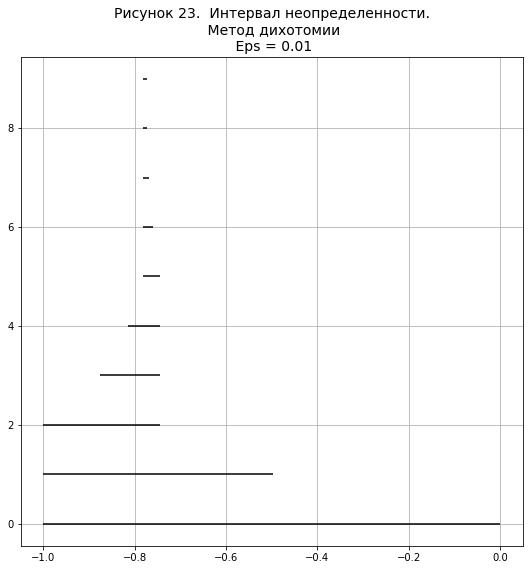

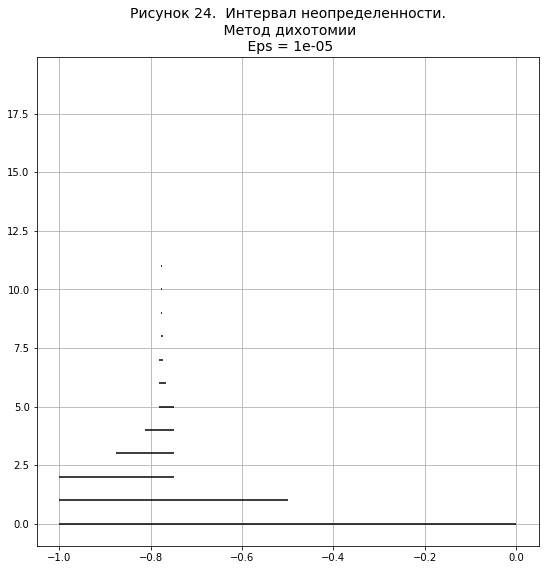

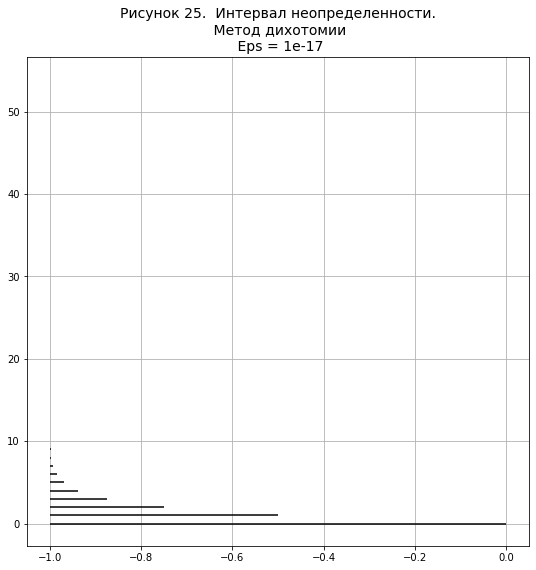

Метод дихотомии
+----+-----------+-------------+-----------------+----------------------+--------+
|    |    X_min  |   F(X_min)  |   Num of iters  |   Num of func calls  |   Eps  |
|----+-----------+-------------+-----------------+----------------------+--------|
|  0 | -0.774102 |    0.550506 |               9 |                   18 |  0.01  |
|  1 | -0.776646 |    0.550518 |              19 |                   38 |  1e-05 |
|  2 | -1        |    0.45029  |              54 |                  108 |  1e-17 |
+----+-----------+-------------+-----------------+----------------------+--------+


In [17]:
def dichotomy(f, left, right, Eps, max_iters):
    counter = funcalls = 0 # Заведем перемнные для подсчета кол-ва итераций и кол-ва вызовов ф-ции
    dotes, iters = [], [] # Инициализируем массив границ промежутка и итераций
    dotes.append([left, right])# Занесем в массив начальные конца отрезка
    iters.append(counter) # Занесем в массив начальную итерацию
    sigma = Eps / 3 # sigma - константая различимость
    c = (left + right) / 2
    
    while abs(right - left) >= Eps and counter <= max_iters: #|right - left| < Eps - условие выхода
        x1 = c - sigma
        x2 = c + sigma
        f1, f2 = f(x1), f(x2)
        c = (left + right) / 2
        if f1 < f2:
            left = x1
        else:
            right = x2
        c = (left + right) / 2
        dotes.append([left, right]) # Добавим новые концы отрезка
        counter += 1
        iters.append(counter) # Добавим следующую итерацию
        funcalls += 2 # Т.к. в конструкци if-else мы вызываем ф-цию дважды, прибавляем 2
        #print(Decimal(min(x1, x2)))
    return [max(x1, x2), counter, funcalls, dotes, iters]


output(dichotomy)

Из полученных результатов сделаем выводы:  
1) Сам метод прост, как в реализации, так и в действии;  
2) Так как функция будет рассматривать точки $x_1$ и $x_2$, вне зависимости от данных, алгоритм будет работать с любыми данными также, как и в в худшем. Т.е. мы будем рассматривать множество лишних данных;  
3) При малом кол-ве итераций - корректно, при большом - некорректно. Это связано с тем, что при увелечении количества итераций элементы дихотомического деления, будут более схожи между собой, т.е. $x_1$ и $x_2$ будут очень близки по значению, что затрудняет поиск мнимума;  
4) При уменьшении Eps, наш отрезок [left, right] может становиться большей длины, что повлияет на точность вычисления x_min.  

## Метод золотого сечения

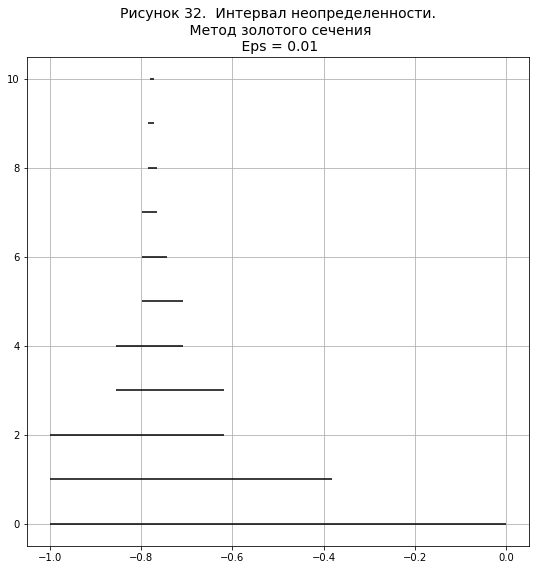

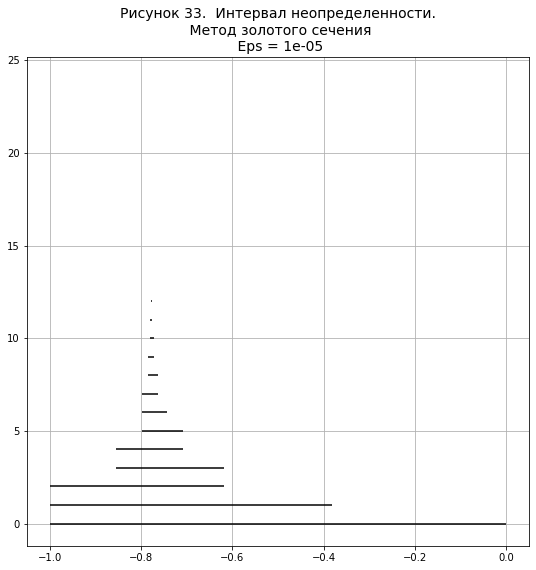

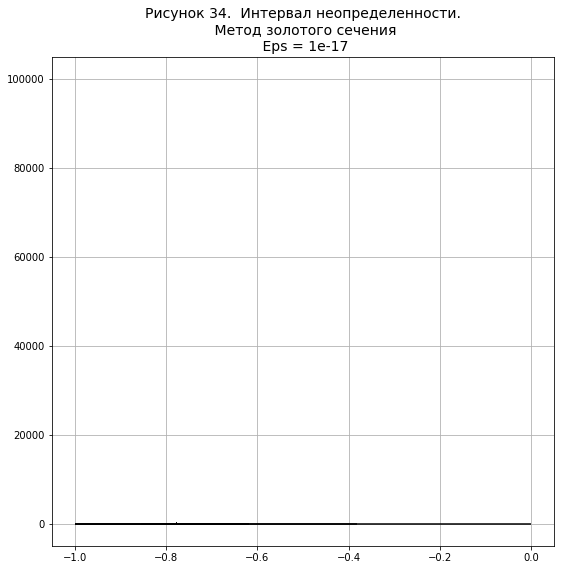

Метод золотого сечения
+----+-----------+-------------+-----------------+----------------------+--------+
|    |    X_min  |   F(X_min)  |   Num of iters  |   Num of func calls  |   Eps  |
|----+-----------+-------------+-----------------+----------------------+--------|
|  0 | -0.776128 |    0.550518 |              10 |                   12 |  0.01  |
|  1 | -0.776649 |    0.550518 |              24 |                   26 |  1e-05 |
|  2 | -0.77665  |    0.550518 |          100000 |               100002 |  1e-17 |
+----+-----------+-------------+-----------------+----------------------+--------+


In [20]:
def GSC(F, left, right, Eps, max_iters):
    counter = funcalls = 0 # Заведем перемнные для подсчета кол-ва итераций и кол-ва вызовов ф-ции
    dotes, iters = [], [] # Инициализируем массив границ промежутка и итераций
    dotes.append([left, right]) # Занесем в массив начальные конца отрезка
    iters.append(counter) # Занесем в массив начальную итерацию
    x1 = right - (right - left) / ((1 + math.sqrt(5))/2) #точка x2 делит отрезок [x1, b] в отношении золотого сечения
    x2 = left + (right - left) / ((1 + math.sqrt(5))/2) #точка x1 делит отрезок [a, x2] в отношении золотого сечения
    f1, f2 = F(x1), F(x2)
    funcalls += 2
    while True: # Реализуем цикл do-while
        if f1 >= f2: 
            right = x2
            x2 = x1
            f2 = f1
            x1 = right - (right - left) / ((1 + math.sqrt(5))/2)
            f1 = F(x1)
            funcalls += 1
        else:
            left = x1
            x1 = x2
            f1 = f2
            x2 = left + (right - left) / ((1 + math.sqrt(5))/2)
            f2 = F(x2)
            funcalls += 1
        dotes.append([left, right]) # Добавим новые концы отрезка
        counter += 1 # Увеличиваем итерацию
        iters.append(counter) # Добавим следующую итерацию
        if abs(right - left) < Eps or counter >= max_iters: 
            # |right - left| < Eps - условие выхода или же произойдет зацикл
            return [(right + left) / 2, counter, funcalls, dotes, iters]
    


output(GSC)

Из полученных результатов сделаем выводы:  
1) Аналогично, метод довольно таки прост;  
2) Кол-во итераций не влияет на результат, лишь увеличивает время работы алгоритма;  
3) Eps не влияет на результат, однако заметно увеличивает время работы алгоритма;  
4) Алгоритм универсален, в плане поступающих данных. Т.е. поступят плохие данные - отработает плохо, иначе  - хорошо. Под словами 'хорошо' и 'плохо', я имею в виду, что может достигаться как нижняя, так и верхняя ассимптотическая граница алгоритма.


# Метод квадратичной аппроксимации

-0.6


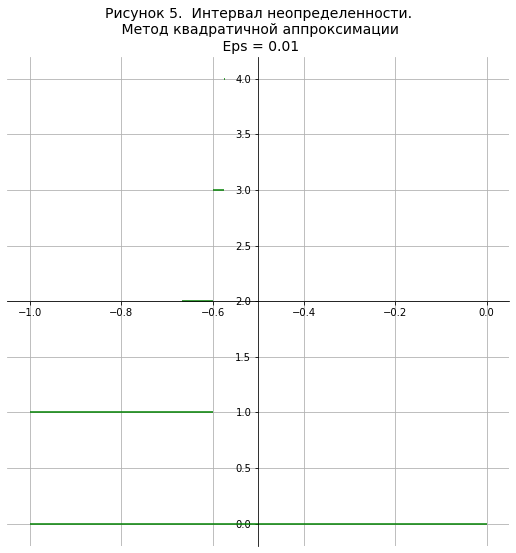

-0.6


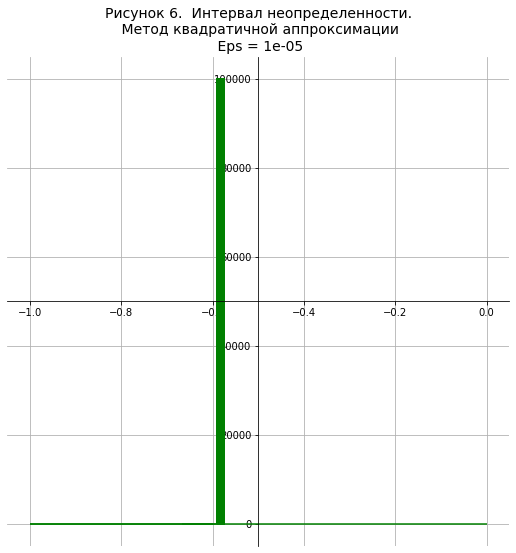

-0.6


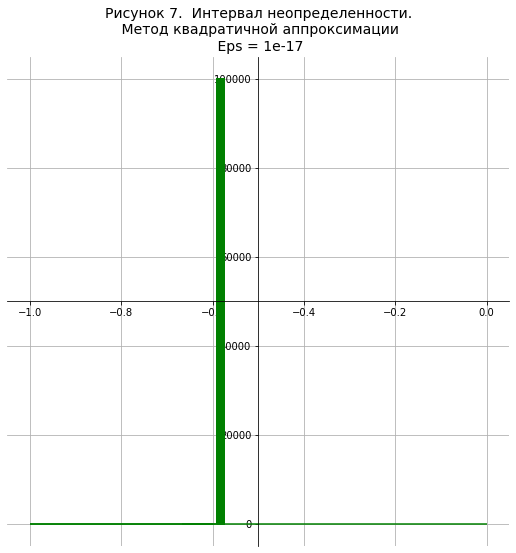

Метод квадратичной аппроксимации
+----+-----------+-------------+-----------------+----------------------+--------+
|    |    X_min  |   F(X_min)  |   Num of iters  |   Num of func calls  |   Eps  |
|----+-----------+-------------+-----------------+----------------------+--------|
|  0 | -0.573709 |   -0.430524 |               4 |                    6 |  0.01  |
|  1 | -0.573663 |   -0.430523 |          100000 |               100002 |  1e-05 |
|  2 | -0.573663 |   -0.430523 |          100000 |               100002 |  1e-17 |
+----+-----------+-------------+-----------------+----------------------+--------+


In [33]:
def powell(f, left, right, Eps, max_iters):
    h = 0.2 * (right - left)
    dotes, iters = [], [] # Инициализируем массив границ промежутка и итераций
    dotes.append([left, right]) # Занесем в массив начальные конца отрезка   
    funcalls, count = 0, 0
    iters.append(count) # Занесем в массив начальную итерацию
    
    
    x1, x2 = left, left +  h# Определим середину
    i, j = 0, 0 # Индексация нам нужна, чтобы при выборе x_min мы перестраивали массив
    x = [x1, x2]
    if f(x[0]) > f(x[1]):
        x3 = left + 2 * h
    else:
        x3 = left - h
    print(x3)
    fx = [f(x1), f(x2), f(x3)]
    x.append(x3)
    funcalls += 3
    
    dotes.append([x3, x1]) # Добавим новый интервал
    count += 1 # Добавим счетчик итераций
    iters.append(count) # Занесем в массив первую итерацию
    while True:
        a1 = (fx[1] - fx[0]) / (x[1] - x[0])
        a2 = 1.0 / (x[2] - x[1]) * ((fx[2] - fx[0]) / (x[2]-x[0])-(fx[1]-fx[0]) / (x[1]-x[0]))
        x_max = (x[1] + x[0]) * 0.5 - a1 / (2 * a2)
        fs = f(x_max)
        funcalls += 1
        if fx[0] < fx[1]:
            if fx[0] < fx[2]:
                i = 0
            else:
                i = 2
        else:
            if fx[1] < fx[2]:
                i = 1
            else:
                i = 2
        count += 1
        iters.append(count)
        dotes.append([x[i], x_max])
        #print(Decimal(x[1] + x[0]) * Decimal(0.5) - Decimal(a1) / (Decimal(2) * Decimal(a2)))
        if ((abs((x_max - x[i]) / x_max) < Eps) and (abs((fs - fx[i])/fs) < Eps)) or count >= max_iters:
            return [x_max, count, funcalls, dotes, iters]
        
        if fx[0] >= fx[1]:
            if fx[0] > fx[2]:
                j = 0
            else:
                j = 2
        else:
            if fx[1] <= fx[2]:
                j = 1
            else:
                j = 2
        
        if (fs <= fx[i]):
            x[j] = x_max
            fx[j] = fs
        else:
            x[j] = 2 * x[i] - x_max
            fx[j] = F(x[j])
        
        
    return [x_max, count, funcalls, dotes, iters]
output(powell)

Наша функция не годиться для поиска минимума с помощью метода квадратичной аппроксимации. 
Программа не сможет найти $x_3$, так как все значения функции правее середины, меньше значения функции в серединной точке (f3 < f1).  
Возьмум функцию F1(x) = F(x) * (-1), чтобы 'перевернуть' нашу функцию и сделать локальный максимум - минимумом.  

Из полученных результатов сделаем выводы:  

1) Алгоритм средней сложности в реализцаии;  

2) Кол-во итераций не влияет на результат, лишь увеличивает время работы алгоритма;  

3) Eps не влияет на результат, лишь увеличивает время работы алгоритма;  

4) Алгоритм быстродейственный.  

5) Алгоритм не справиться с линейными функциями. Также он некорректно отработает, когда f'' $\leq$ 0, так как функция будет выпукла вверх и вершиной параболы окажется локальный максимум, хотя ищем мы минимум.

# Выводы

В данной работе я использовал 3 метода оптимизации, чтобы найти локальный минимум функции и значение целевой функции в данной точке.  

Попробуем проанализировать результаты методов, чтобы сделать выводы о них:

По быстродействию:

1) Метод Пауэлла;  

2) Метод дихотомии;  

3) Метод золотого сечения; 

Хоть метод дихотомии и быстрее метода золотого сечения, но при малых точностях работает некорректно. А метод золотого сечения при малых точностях работает корректно, хоть и в результате огромного количества итераций.  

По простоте метод дихотомии и метод золотого сечения аналогичны, а вот метод Пауэлла сложнее в реализации.  

Хоть метод Пауэлла выглядит самым оптимальным и наилучшим вариантом для поиска локального экстремума, у него есть явные недостатки. Так как мы аппроксимируем функцию параболой, наша функция должна быть многочленом как минимум второй степени. Если функция выпукла вверх/вниз мы сможем найти лишь локальный максимум/минимум.  
  
  
Ошибки RuntimeWarning в программе неизбежны, так как функция считает большой массив данных и некоторые значения оказываются некорректными и им присваивается значение NaN.

In [38]:
a = np.zeros(shape=(0,2))
a = np.concatenate((a, np.array([3, 4])))

print(a)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)